In [4]:
using Distributions, Plots, LinearAlgebra;

# Nota implementacyjna

In [98]:
function minimumSpanningTree(X, norm = (x,v)-> sum((x-v).^2))
    n,m = size(X)
    A = zeros(Int, n-1, 2)
    weights = zeros(n-1)
    in_set = falses(n)
    
    # Inicjalizacja
    
    ## pierwszy wierzchołek
    in_set[1] = true
    
    ## Macierz dystansów z.B
    # [Inf  1    2]
    # [1   Inf   2]
    # [2   2   Inf]
    
    dist = repeat([Inf],n,n)
    for i in 2:n
        for j in 1:(i-1)
            d = norm(X[i,:],X[j,:])
            dist[i,j] = d
            dist[j,i] = d
        end
    end
    
    for i in 1:(n-1)
        # znaleźć najbliższy
        amin = argmin(dist[in_set, .!in_set])
        
        A[i, :] = [findall(in_set)[amin[1]], findall(.!in_set)[amin[2]]]
        
        weights[i] = dist[in_set, .!in_set][amin]
        
        @views in_set[.!in_set][amin[2]] = true 
    end
    return A, weights
end

create_minimumSpanningTree (generic function with 3 methods)

# Test

In [99]:
n = 1000
X = [rand(Normal(0,1), n, 2) ; rand(Normal(5,1), n, 2)];

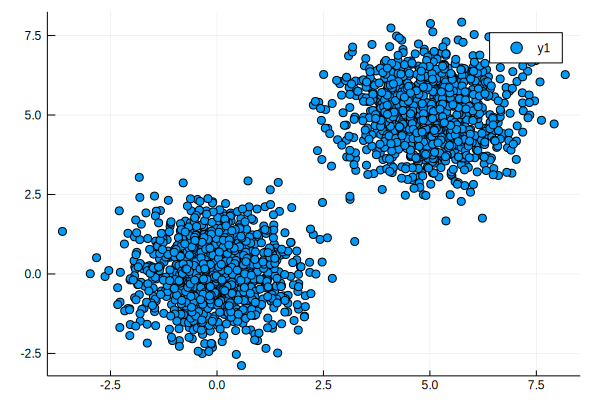

In [100]:
scatter(X[:,1], X[:,2])

In [101]:
tree, weights = minimumSpanningTree(X)

([1 909; 909 574; … ; 1347 1681; 354 914], [0.00320042, 0.00128781, 0.00046919, 0.00240077, 0.00385773, 0.00121472, 0.00607937, 0.00284207, 0.00457987, 0.000879738  …  0.191969, 0.0716799, 0.210865, 0.094744, 0.0882088, 0.238422, 0.402922, 0.505853, 0.52356, 1.3242])

In [102]:
tree

1999×2 Array{Int64,2}:
    1   909
  909   574
  574   605
  605   115
  115   513
  513   408
  408    21
   21   982
   21    56
   56   892
  892    57
   57   490
  490   440
    ⋮      
 1254  1648
 1606  1103
 1052  1370
 1370  1369
 1173  1051
 1051  1597
 1597  1001
 1726  1605
 1103  1067
 1347  1884
 1347  1681
  354   914

In [104]:
weights;

In [110]:
i = partialsortperm(-weights, 1:10)

10-element view(::Array{Int64,1}, 1:10) with eltype Int64:
 1999
 1001
  998
 1998
 1997
  999
  997
 1996
  996
  995

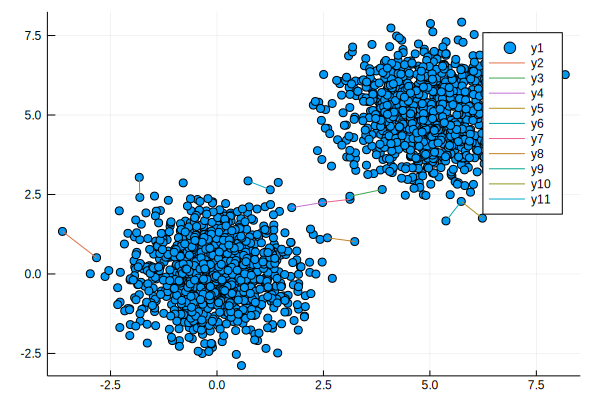

In [111]:
scatter(X[:,1], X[:,2])
plot!(X[tree[i[1], :], 1], X[tree[i[1], :], 2])
plot!(X[tree[i[2], :], 1], X[tree[i[2], :], 2])
plot!(X[tree[i[3], :], 1], X[tree[i[3], :], 2])
plot!(X[tree[i[4], :], 1], X[tree[i[4], :], 2])
plot!(X[tree[i[5], :], 1], X[tree[i[5], :], 2])
plot!(X[tree[i[6], :], 1], X[tree[i[6], :], 2])
plot!(X[tree[i[7], :], 1], X[tree[i[7], :], 2])
plot!(X[tree[i[8], :], 1], X[tree[i[8], :], 2])
plot!(X[tree[i[9], :], 1], X[tree[i[9], :], 2])
plot!(X[tree[i[10], :], 1], X[tree[i[10], :], 2])

In [97]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [108]:
?sortperm

search: sortperm sortperm! partialsortperm partialsortperm! isconcretetype



```
sortperm(v; alg::Algorithm=DEFAULT_UNSTABLE, lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Return a permutation vector `I` that puts `v[I]` in sorted order. The order is specified using the same keywords as `sort!`. The permutation is guaranteed to be stable even if the sorting algorithm is unstable, meaning that indices of equal elements appear in ascending order.

See also [`sortperm!`](@ref).

# Examples

```jldoctest
julia> v = [3, 1, 2];

julia> p = sortperm(v)
3-element Array{Int64,1}:
 2
 3
 1

julia> v[p]
3-element Array{Int64,1}:
 1
 2
 3
```
